## *Business Understanding*

## *Data Understanding*

### *Import Libraries*

In [128]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

#statistics libraries 
from scipy import stats
import statistics as stat
from scipy.stats import chi2_contingency,mannwhitneyu


#database connection
import pyodbc
from dotenv import dotenv_values

# hide warning
import warnings
warnings.filterwarnings('ignore')


### Setup Connections

In [129]:
# load environment variable from .env file
environment_variables =dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
 
connection = pyodbc.connect(connection_string)

### Data loading 

### Load datasets from the excel file

In [130]:
january_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_January_2019.csv')
january_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [131]:
febuary_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_February_2019.csv')
febuary_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [132]:
march_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_March_2019.csv')
march_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [133]:
april_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_April_2019.csv')
april_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [134]:
may_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_May_2019.csv')
may_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [135]:
june_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_June_2019.csv')
june_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


### Concatenate all the data in the excel file and name is csv_data

In [136]:
csv_data = pd.concat([january_data,febuary_data,march_data,april_data,may_data,june_data],axis=0)
# convert to dataframe
csv_df = pd.DataFrame(csv_data)
csv_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Laod the datasets from the database 

In [137]:
query = "SELECT * FROM dbo.Sales_July_2019"

july_data = pd.read_sql(query,connection)
july_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [138]:
query = "SELECT * FROM dbo.Sales_August_2019"

august_data = pd.read_sql(query,connection)
august_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [139]:
query = "SELECT * FROM dbo.Sales_September_2019"

september_data = pd.read_sql(query,connection)
september_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [140]:
query = "SELECT * FROM dbo.Sales_October_2019"

october_data = pd.read_sql(query,connection)
october_data.head()

In [66]:
query = "SELECT * FROM dbo.Sales_November_2019"

november_data = pd.read_sql(query,connection)
november_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [67]:
query = "SELECT * FROM dbo.Sales_December_2019"

december_data = pd.read_sql(query,connection)
december_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


### concatenate all the dataset from the sql database and name it database_data


In [68]:
sql_data = pd.concat([july_data,august_data,september_data,october_data,november_data,december_data],axis=0)
sql_df = pd.DataFrame(sql_data)
sql_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


#### *Exploratory Data Analysis*


In [69]:
# explore the csv_data
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [70]:
csv_df.describe().T

,count,unique,top,freq
Order ID,85380,81677,Order ID,160
Product,85380,20,USB-C Charging Cable,9952
Quantity Ordered,85380,9,1,77205
Price Each,85380,23,11.95,9952
Order Date,85380,66474,Order Date,160
Purchase Address,85380,72960,Purchase Address,160


In [71]:
csv_df.duplicated().sum()

np.int64(511)

In [72]:
# check for unique value,number of unique values and missing values
def print_unique_values_and_count(df, columns):
    for column in columns:
        unique_values = df[column].unique()
        num_unique = unique_values.size
        missing_values = df[column].isnull().sum()
        num_duplicates = df[column].duplicated().sum()
        
        print(f"Column: {column}")
        print("Unique values:", unique_values)
        print(f"Number of unique values: {num_unique}")
        print(f"Missing values: {missing_values}")
        print(f"number of duplicates: {num_duplicates}")
        print("-" * 40)


In [73]:
# print for each columns
columns_to_check_in_csv_df = ["Order ID","Product", "Price Each", "Purchase Address", "Quantity Ordered","Order Date"]
print_unique_values_and_count(csv_df, columns_to_check_in_csv_df)

Column: Order ID
Unique values: ['141234' '141235' '141236' ... '222907' '222908' '222909']
Number of unique values: 81678
Missing values: 245
number of duplicates: 3947
----------------------------------------
Column: Product
Unique values: ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Number of unique values: 21
Missing values: 245
number of duplicates: 85604
----------------------------------------
Column: Price Each
Unique values: ['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0']
Number o

##### Insight on csv_df

- The csv_df contain 6 columns and 85625 rows
- The number of order id is 85380
- The csv_df all the columns except the product are not in the right datatype format
- There are 20 unique products that where ordered with USB-C charging cable been the most ordered product
- The dataset contain 81677 unique Order ID ,this indicates that there are multiple duplicate in the dataframe resulting to 3947 duplicates 
- The fact that a quantity of 1 is the most common (77,205 occurrences) suggests that most transactions are for single items.
- The price and quantity ordered columns contain non numeric values.
- The product column also contain missing values


In [74]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [75]:
# summary statistics of the dataset
sql_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,100730.0,NaN,NaN,NaN,271309.400338,27917.487448,222910.0,247141.25,271335.5,295475.75,319670.0
Product,100925,20,USB-C Charging Cable,11951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity_Ordered,100730.0,NaN,NaN,NaN,1.124432,0.44642,1.0,1.0,1.0,1.0,9.0
Price_Each,100730.0,NaN,NaN,NaN,183.043312,332.133484,2.99,11.95,14.95,150.0,1700.0
Order_Date,100730,75922,2015-12-19 20:16:00.0000000,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase_Address,100925,84781,Purchase Address,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# check for unique values,number of unique values and missing values in sql_df
columns_to_check_in_sql_df = ["Order_ID","Product", "Price_Each", "Purchase_Address", "Quantity_Ordered","Order_Date"]
print_unique_values_and_count(sql_df, columns_to_check_in_sql_df)

Column: Order_ID
Unique values: [222910. 222911. 222912. ... 319668. 319669. 319670.]
Number of unique values: 96762
Missing values: 495
number of duplicates: 4463
----------------------------------------
Column: Product
Unique values: ['Apple Airpods Headphones' 'Flatscreen TV' 'AA Batteries (4-pack)'
 'AAA Batteries (4-pack)' 'Bose SoundSport Headphones' 'Google Phone'
 'LG Dryer' 'USB-C Charging Cable' 'Lightning Charging Cable'
 '34in Ultrawide Monitor' 'Wired Headphones' 'Vareebadd Phone'
 '27in FHD Monitor' '20in Monitor' 'ThinkPad Laptop'
 '27in 4K Gaming Monitor' 'Macbook Pro Laptop' 'iPhone' None
 'LG Washing Machine' 'Product']
Number of unique values: 21
Missing values: 300
number of duplicates: 101204
----------------------------------------
Column: Price_Each
Unique values: [ 150.          300.            3.83999991    2.99000001   99.98999786
  600.           11.94999981   14.94999981  379.98999023   11.98999977
  400.          149.99000549  109.98999786  999.98999023  38

#### Insight on sql_df

- The sql_df contains 6 columns and 101225 row 
- The number of order id is 100730 with no missing values
- There are 96762 unique order Id, this shows that there are multiple entries for some product resulting to 4463 duplicates.
- The sql_df also contain columns with unmatching datatype such as the order_id, quantity ordered,order date.
- 75% 0f quantity ordered by cutomers are 1 which makes it the minimum quantity ordered while 9 is the maximum quatity ordered (this shows that customers primarily purchase single items )
- 0.45 standard deviation indicates that the majority of orders do not deviate significantly from a quantity of 1.
- The average price per item is $183.04 although the standard deviation of $332.13 indicates a large spread in the price of items. which means some items are far more expensive 
- the lowest price for an item is $2.99 while the most expensive item in the dataset is $1700 
- 25% of the product are below $11.95, 50% are below $14.95 while 75% are below #150

## *Data Preparation and Data Cleaning*

#### Concatenate the csv_data containing the first half of the year transaction with the sql data which contains the last half of the year. but before that ensure the columns name are the same with same datatype.

In [77]:
# rename the columns in the csv dataset to march with the sql dataset
csv_df.columns = ["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
csv_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [78]:
# convert each columns to it appropriate data type 
def convert_data_types(df):
      # Strip column names of leading/trailing whitespace
    df.columns = df.columns.str.strip()

    # Print columns for debugging purposes
    print("Available columns:", df.columns)

    # Convert 'Order ID' to integer
    df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce').astype('Int64')  # Using Int64 to handle missing values (NaN)
    
    # Convert 'Price' to float
    df['Price_Each'] = pd.to_numeric(df['Price_Each'], errors='coerce').astype(float)
    
    # Convert 'Quantity Ordered' to integer
    df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered'], errors='coerce').astype('Int64')
    
    # Convert 'Order Date' to datetime, removing time and handling errors
    df['Order_Date'] = pd.to_datetime(df.get('Order_Date'), errors='coerce', infer_datetime_format=True).dt.date 
    return df

In [79]:
csv_df = convert_data_types(csv_df)
sql_df = convert_data_types(sql_df)

Available columns: Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
Available columns: Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')


##### *check if the columns are now in the right datatype format*

In [80]:
csv_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,2019-06-01,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26,"916 Main St, San Francisco, CA 94016"


In [81]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          85220 non-null  Int64  
 1   Product           85380 non-null  object 
 2   Quantity_Ordered  85220 non-null  Int64  
 3   Price_Each        85220 non-null  float64
 4   Order_Date        85220 non-null  object 
 5   Purchase_Address  85380 non-null  object 
dtypes: Int64(2), float64(1), object(3)
memory usage: 4.7+ MB


In [82]:
sql_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.000000,2026-07-19,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.000000,2005-07-19,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.840000,2029-07-19,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.840000,2028-07-19,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.990000,2031-07-19,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2011-12-19,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2001-12-19,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2009-12-19,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2003-12-19,"778 River St, Dallas, TX 75001"


In [83]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  Int64  
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  Int64  
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: Int64(2), float64(1), object(3)
memory usage: 5.6+ MB


In [84]:
csv_df["Order_ID"].duplicated().sum()

np.int64(3948)

In [85]:
sql_df["Order_ID"].duplicated().sum()

np.int64(4463)

#### Concatenate the dataset 

In [86]:
combined_df = pd.concat([csv_df,sql_df],axis = 0)
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.000000,2019-01-22,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,2019-01-17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990000,2019-01-05,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,2019-01-25,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2011-12-19,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2001-12-19,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2009-12-19,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2003-12-19,"778 River St, Dallas, TX 75001"


#### *Check and remove duplicate from the dataset*

#### Order ID Column

In [87]:
# check for duplicates in the order id
combined_df["Order_ID"].duplicated().sum()

np.int64(8412)

In [88]:
# drop duplicates 
combined_df = combined_df.drop_duplicates()

In [89]:
# check for missing values
combined_df.isnull().sum()

Order_ID            2
Product             1
Quantity_Ordered    2
Price_Each          2
Order_Date          2
Purchase_Address    1
dtype: int64

In [90]:
# drop missing values 
combined_df = combined_df.dropna() 

#### cleaning the product column

In [91]:
# check for unique values in the prodcuts columns
combined_df["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

#### the columns contains missing values,typo errors. map each values to the right categories 

In [92]:
# Normalize text
combined_df['Product'] = combined_df['Product'].astype(str).str.lower().str.strip()

# Define replacements for similar items
replacements = {
    'iphone': 'iphone',
    'lightning charging cable': 'lightning charging cable',
    'wired headphones': 'wired headphones',
    '27in fhd monitor': '27in fhd monitor',
    'aaa batteries (4-pack)': 'aaa batteries (4-pack)',
    '27in 4k gaming monitor': '27in 4k gaming monitor',
    'usb-c charging cable': 'usb-c charging cable',
    'bose soundsport headphones': 'bose soundsport headphones',
    'apple airpods headphones': 'apple airpods headphones',
    'macbook pro laptop': 'macbook pro laptop',
    'flatscreen tv': 'flatscreen tv',
    'vareebadd phone': 'vareebadd phone',  
    'aa batteries (4-pack)': 'aaa batteries (4-pack)',
    'google phone': 'google phone',
    '20in monitor': '20in monitor',
    '34in ultrawide monitor': '34in ultrawide monitor',
    'thinkpad laptop': 'thinkpad laptop',
    'lg dryer': 'lg dryer',
    'lg washing machine': 'lg washing machine',
    'product': 'unknown product',
    }

# Replace similar values
combined_df['Product'] = combined_df['Product'].map(replacements).fillna(combined_df['Product'])


In [93]:
combined_df["Product"].value_counts()

Product
aaa batteries (4-pack)        41170
usb-c charging cable          21859
lightning charging cable      21610
wired headphones              18849
apple airpods headphones      15525
bose soundsport headphones    13298
27in fhd monitor               7498
iphone                         6840
27in 4k gaming monitor         6225
34in ultrawide monitor         6174
google phone                   5522
flatscreen tv                  4794
macbook pro laptop             4721
thinkpad laptop                4126
20in monitor                   4098
vareebadd phone                2065
lg washing machine              666
lg dryer                        646
Name: count, dtype: int64

#### quantity_ordered column


In [94]:
combined_df["Quantity_Ordered"].unique()

<IntegerArray>
[1, 2, 3, 5, 4, 7, 6, 9, 8]
Length: 9, dtype: Int64

cleaning th Order_Date	columns


In [95]:
# check for the datatype of the ordered_date columns
combined_df["Order_Date"].dtype

dtype('O')

In [96]:
# Convert the 'Order_Date' column to datetime
combined_df['Order_Date'] = pd.to_datetime(combined_df['Order_Date'], errors='coerce')

# Check the new data type
print(combined_df['Order_Date'].dtype)

datetime64[ns]


In [97]:
# check for unique values
unique_values = combined_df['Order_Date'].unique()
print(unique_values)

<DatetimeArray>
['2019-01-22 00:00:00', '2019-01-28 00:00:00', '2019-01-17 00:00:00',
 '2019-01-05 00:00:00', '2019-01-25 00:00:00', '2019-01-29 00:00:00',
 '2019-01-26 00:00:00', '2019-01-01 00:00:00', '2019-01-07 00:00:00',
 '2019-01-31 00:00:00',
 ...
 '2026-12-19 00:00:00', '2021-12-19 00:00:00', '2007-12-19 00:00:00',
 '2003-12-19 00:00:00', '2027-12-19 00:00:00', '2005-12-19 00:00:00',
 '2019-12-19 00:00:00', '2002-12-19 00:00:00', '2009-12-19 00:00:00',
 '2001-01-20 00:00:00']
Length: 367, dtype: datetime64[ns]


from the given output for the unique values in the ordered_date there are other years which are not 2019.this could be as a result of typo error.

In [98]:
# convert the years back to 2019
def replace_year(date):
    if date.year != 2019:
        return date.replace(year=2019)
    else:
        return date

# Apply the function to the 'Order_Date' column
combined_df['Order_Date'] = combined_df['Order_Date'].apply(replace_year)

# Verify the result
print(combined_df['Order_Date'].head())

0   2019-01-22
1   2019-01-28
2   2019-01-17
3   2019-01-05
4   2019-01-25
Name: Order_Date, dtype: datetime64[ns]


In [99]:
# confirm if all date are 2019
unique_values = combined_df['Order_Date'].unique()
print(unique_values)

<DatetimeArray>
['2019-01-22 00:00:00', '2019-01-28 00:00:00', '2019-01-17 00:00:00',
 '2019-01-05 00:00:00', '2019-01-25 00:00:00', '2019-01-29 00:00:00',
 '2019-01-26 00:00:00', '2019-01-01 00:00:00', '2019-01-07 00:00:00',
 '2019-01-31 00:00:00',
 ...
 '2019-06-04 00:00:00', '2019-06-18 00:00:00', '2019-06-10 00:00:00',
 '2019-07-01 00:00:00', '2019-07-19 00:00:00', '2019-08-19 00:00:00',
 '2019-09-19 00:00:00', '2019-10-19 00:00:00', '2019-11-19 00:00:00',
 '2019-12-19 00:00:00']
Length: 188, dtype: datetime64[ns]


In [107]:
# Create a new column 'Month' by extracting the month from 'Order_Date'
combined_df['Month'] = combined_df['Order_Date'].dt.month

# Verify the result
print(combined_df[['Order_Date', 'Month']].head())

  Order_Date  Month
0 2019-01-22      1
1 2019-01-28      1
2 2019-01-17      1
3 2019-01-05      1
4 2019-01-25      1


create a new column for sales by multiplying each prices with the quantity ordered 

In [108]:
# Create a new column 'Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
combined_df['Sales'] = combined_df['Quantity_Ordered'] * combined_df['Price_Each']

# Verify the result
print(combined_df[['Quantity_Ordered', 'Price_Each', 'Sales']].head())


   Quantity_Ordered  Price_Each   Sales
0                 1      700.00   700.0
1                 1       14.95   14.95
2                 2       11.99   23.98
3                 1      149.99  149.99
4                 1       11.99   11.99


In [106]:
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iphone,1,700.000000,2019-01-22,"944 Walnut St, Boston, MA 02215"
1,141235,lightning charging cable,1,14.950000,2019-01-28,"185 Maple St, Portland, OR 97035"
2,141236,wired headphones,2,11.990000,2019-01-17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in fhd monitor,1,149.990000,2019-01-05,"738 10th St, Los Angeles, CA 90001"
4,141238,wired headphones,1,11.990000,2019-01-25,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,lightning charging cable,1,14.950000,2019-12-19,"14 Madison St, San Francisco, CA 94016"
25113,319667,aaa batteries (4-pack),2,3.840000,2019-12-19,"549 Willow St, Los Angeles, CA 90001"
25114,319668,vareebadd phone,1,400.000000,2019-12-19,"273 Wilson St, Seattle, WA 98101"
25115,319669,wired headphones,1,11.990000,2019-12-19,"778 River St, Dallas, TX 75001"


In [101]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  Int64         
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  Int64         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
dtypes: Int64(2), datetime64[ns](1), float64(1), object(2)
memory usage: 10.3+ MB


### cleaning the purchase_address column

In [102]:
# check for missing values
combined_df["Purchase_Address"].isnull().sum()

np.int64(0)

In [110]:
# check for unique values 
combined_df["Purchase_Address"].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

extract the cities from the address has this can be used to generate insight 

In [111]:
# Define a function to extract city from the address
def get_city(address):
    return address.split(",")[1].strip()

# Apply the function to create a new 'City' column
combined_df['City'] = combined_df['Purchase_Address'].apply(get_city)

# Display the updated DataFrame with the new 'City' column
print(combined_df.head())

   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0    141234                    iphone                 1      700.00   
1    141235  lightning charging cable                 1       14.95   
2    141236          wired headphones                 2       11.99   
3    141237          27in fhd monitor                 1      149.99   
4    141238          wired headphones                 1       11.99   

  Order_Date                       Purchase_Address  Month   Sales  \
0 2019-01-22        944 Walnut St, Boston, MA 02215      1   700.0   
1 2019-01-28       185 Maple St, Portland, OR 97035      1   14.95   
2 2019-01-17  538 Adams St, San Francisco, CA 94016      1   23.98   
3 2019-01-05     738 10th St, Los Angeles, CA 90001      1  149.99   
4 2019-01-25          387 10th St, Austin, TX 73301      1   11.99   

            City  
0         Boston  
1       Portland  
2  San Francisco  
3    Los Angeles  
4         Austin  


In [112]:
# summary statistics
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_ID,185686.0,230411.376227,141234.0,185833.25,230354.5,275028.75,319670.0,51511.717183
Quantity_Ordered,185686.0,1.124544,1.0,1.0,1.0,1.0,9.0,0.443069
Price_Each,185686.0,184.519255,2.99,11.95,14.95,150.0,1700.0,332.843838
Order_Date,185686,2019-07-19 21:27:09.835313152,2019-01-01 00:00:00,2019-04-16 00:00:00,2019-07-19 00:00:00,2019-10-19 00:00:00,2019-12-19 00:00:00,NaN
Month,185686.0,7.058653,1.0,4.0,7.0,10.0,12.0,3.502932
Sales,185686.0,185.611935,2.99,11.95,14.95,150.0,3400.0,333.032117


In [113]:
combined_df.describe(include="object").T

,count,unique,top,freq
Product,185686,18,aaa batteries (4-pack),41170
Purchase_Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9
City,185686,9,San Francisco,44662


In [126]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 25116
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  Int64         
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  Int64         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   Month             185686 non-null  int32         
 7   Sales             185686 non-null  Float64       
 8   City              185686 non-null  object        
 9   Order_Month       185686 non-null  int32         
 10  Order_Day         185686 non-null  int32         
 11  Day               185686 non-null  int32         
dtypes: Float64(1), Int64(2), datetime64[ns](1), float64(1), int32(4), object(3)
memory usage: 16.1+ MB


#### Univariate Analysis


Univariate Analysis for Quantity_Ordered:
count    185686.0
mean     1.124544
std      0.443069
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           9.0
Name: Quantity_Ordered, dtype: Float64


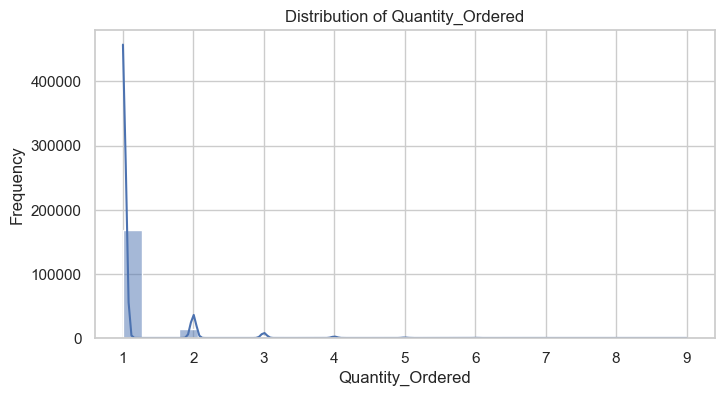


Univariate Analysis for Price_Each:
count    185686.000000
mean        184.519255
std         332.843838
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price_Each, dtype: float64


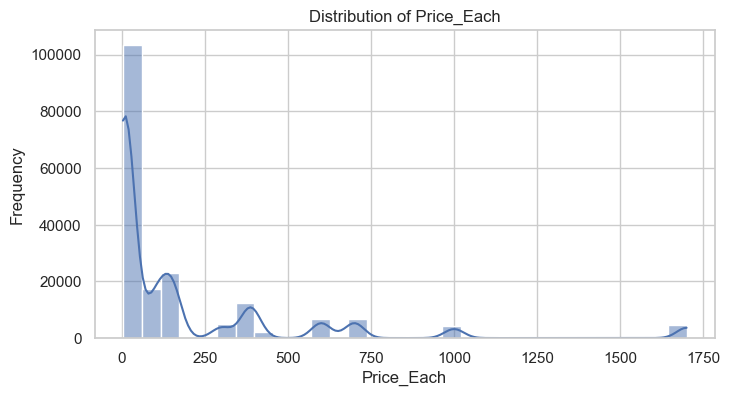


Univariate Analysis for Sales:
count      185686.0
mean     185.611935
std      333.032117
min            2.99
25%           11.95
50%           14.95
75%           150.0
max          3400.0
Name: Sales, dtype: Float64


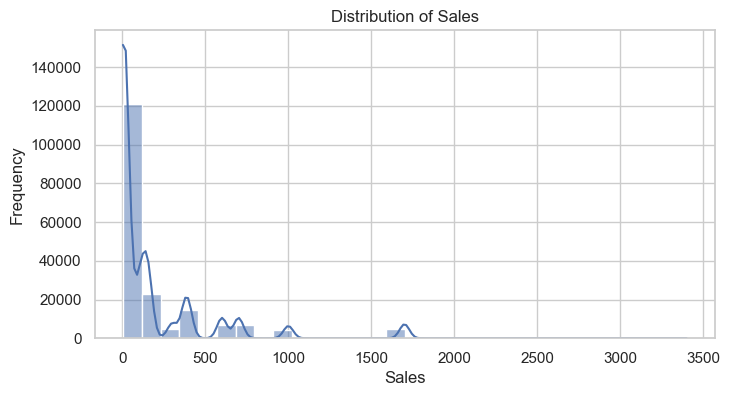


Univariate Analysis for Month:
count    185686.000000
mean          7.058653
std           3.502932
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64


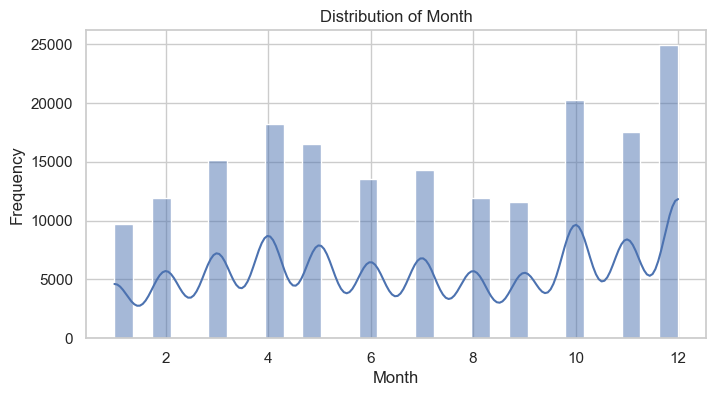

In [116]:
# Set plot style
sns.set(style="whitegrid")

# List of numeric columns (excluding 'Order_ID')
numeric_columns = ['Quantity_Ordered', 'Price_Each', 'Sales', 'Month']

# Univariate analysis for each numeric column
for col in numeric_columns:
    print(f"\nUnivariate Analysis for {col}:")
    
    # Display basic statistics
    print(combined_df[col].describe())
    
    # Create a histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(combined_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Bivariate Analysis 

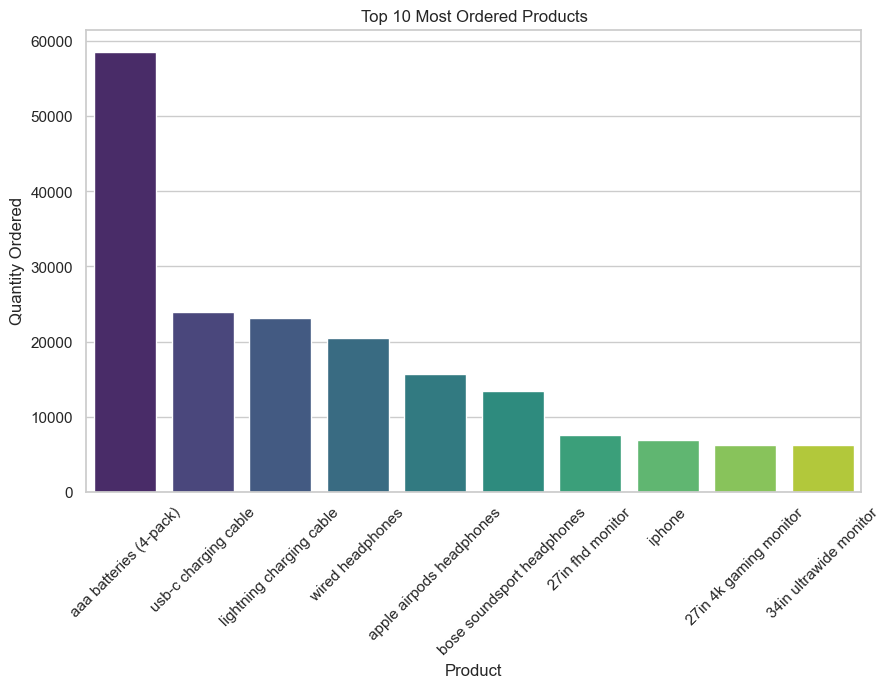

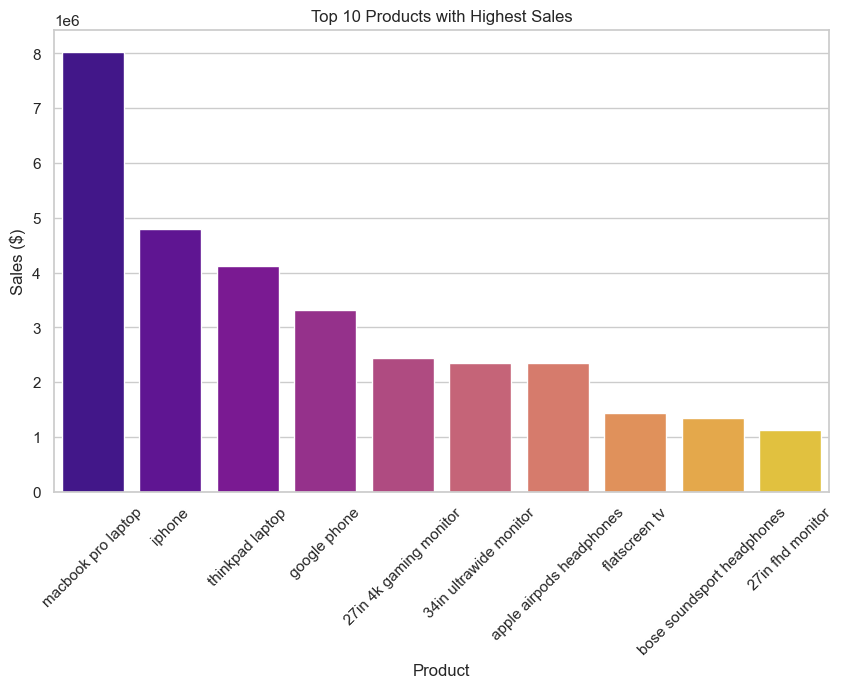

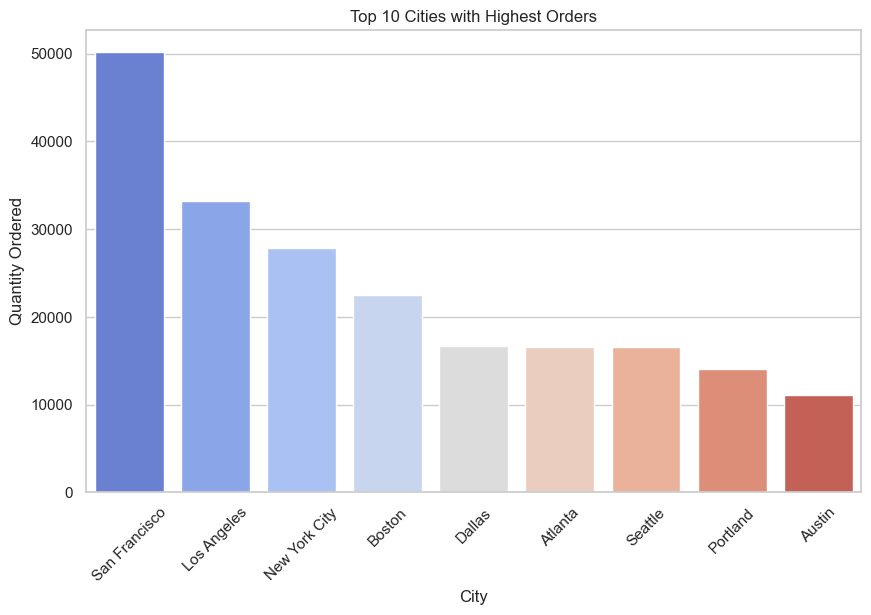

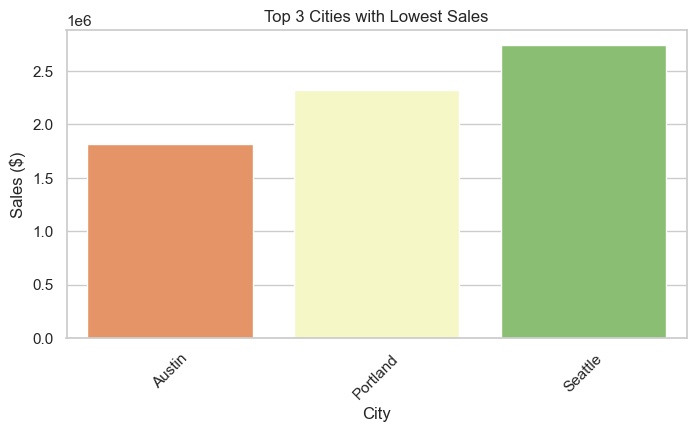

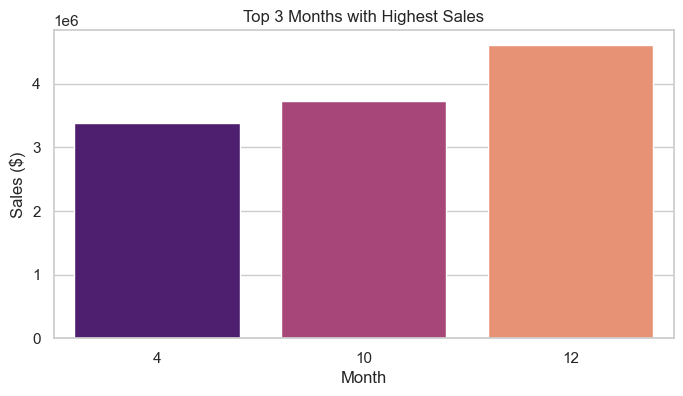

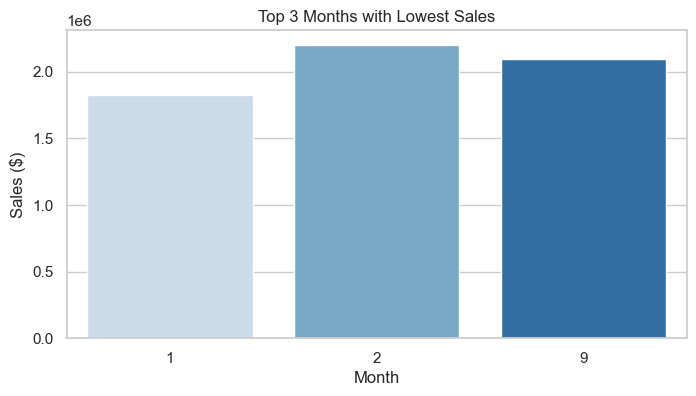

In [122]:
# Set plot style
sns.set(style="whitegrid")

# Bivariate Analysis - Most ordered product
most_ordered_products = combined_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_ordered_products.index[:10], y=most_ordered_products.values[:10], palette="viridis")
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Top 10 products with the highest sales
top_sales_products = combined_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_products.index[:10], y=top_sales_products.values[:10], palette="plasma")
plt.title('Top 10 Products with Highest Sales')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Top 10 cities with the highest orders
top_cities_orders = combined_df.groupby('City')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_orders.index[:10], y=top_cities_orders.values[:10], palette="coolwarm")
plt.title('Top 10 Cities with Highest Orders')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Top 3 cities with the lowest sales
lowest_sales_cities = combined_df.groupby('City')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=lowest_sales_cities.index, y=lowest_sales_cities.values, palette="RdYlGn")
plt.title('Top 3 Cities with Lowest Sales')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Top 3 months with the highest sales
top_sales_months = combined_df.groupby('Month')['Sales'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_sales_months.index, y=top_sales_months.values, palette="magma")
plt.title('Top 3 Months with Highest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

# Top 3 months with the lowest sales
lowest_sales_months = combined_df.groupby('Month')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=lowest_sales_months.index, y=lowest_sales_months.values, palette="Blues")
plt.title('Top 3 Months with Lowest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()


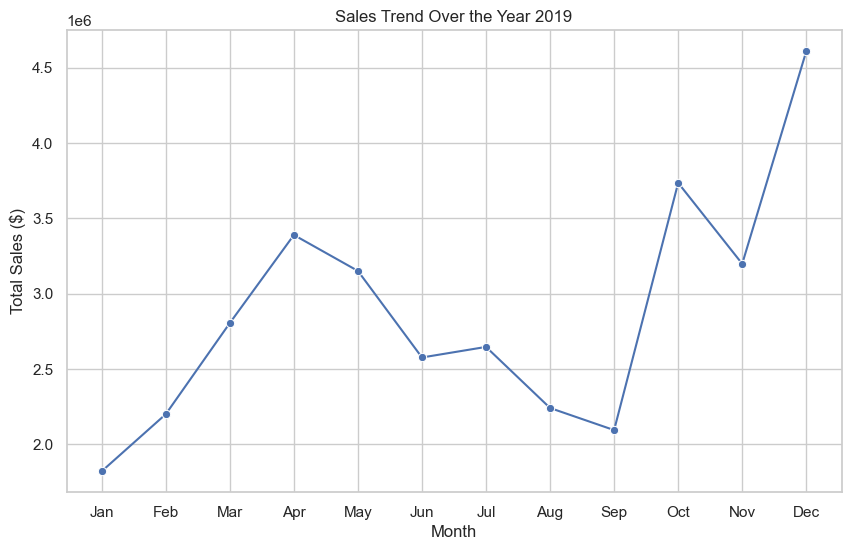

In [127]:
# Extract month and day to analyze sales trend over time
# combined_df['Month'] = combined_df['Order_Date'].dt.month
# combined_df['Day'] = combined_df['Order_Date'].dt.day

# Group by month to get the total sales for each month
monthly_sales = combined_df.groupby('Month')['Sales'].sum()

# Plot sales trend over the year 2019
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Sales Trend Over the Year 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [125]:
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Order_Month,Order_Day,Day
0,141234,iphone,1,700.000000,2019-01-22,"944 Walnut St, Boston, MA 02215",1,700.0,Boston,1,22,22
1,141235,lightning charging cable,1,14.950000,2019-01-28,"185 Maple St, Portland, OR 97035",1,14.95,Portland,1,28,28
2,141236,wired headphones,2,11.990000,2019-01-17,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,1,17,17
3,141237,27in fhd monitor,1,149.990000,2019-01-05,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,1,5,5
4,141238,wired headphones,1,11.990000,2019-01-25,"387 10th St, Austin, TX 73301",1,11.99,Austin,1,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,lightning charging cable,1,14.950000,2019-12-19,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,12,19,19
25113,319667,aaa batteries (4-pack),2,3.840000,2019-12-19,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12,19,19
25114,319668,vareebadd phone,1,400.000000,2019-12-19,"273 Wilson St, Seattle, WA 98101",12,400.0,Seattle,12,19,19
25115,319669,wired headphones,1,11.990000,2019-12-19,"778 River St, Dallas, TX 75001",12,11.99,Dallas,12,19,19
